In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [4]:
n = X.shape[1]
alpha = 6e-2 # если немного увеличить альфа, до 7е-2, то алгоритм расходится
W = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    
    if i % 100 == 0:
        print(i, W, err)

0 [ 7.612 20.9  ] 3173.15
100 [47.16625286  3.92288138] 45.94015500316733
200 [47.23203786  3.91073367] 45.937500006742276
300 [47.23214269  3.91071432] 45.93750000000002
400 [47.23214286  3.91071429] 45.9375
500 [47.23214286  3.91071429] 45.93749999999999
600 [47.23214286  3.91071429] 45.937500000000014
700 [47.23214286  3.91071429] 45.937500000000014
800 [47.23214286  3.91071429] 45.937500000000014
900 [47.23214286  3.91071429] 45.937500000000014


In [13]:
n = X.shape[1]
alpha = 6e-2
W = np.array([1, 0.5])

for i in range(500):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#   W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
#   заменяем np.sum и обычное умножение на скалярное, так как работаем сразу с нампаевской матрицей
#   получаем точно те же самые значения, профит
    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    
    if i % 50 == 0:
        print(i, W, err)

0 [ 7.612 20.9  ] 3173.15
50 [45.5816168   4.21574742] 47.603575735386094
100 [47.16625286  3.92288138] 45.94015500316733
150 [47.22951256  3.91119999] 45.937504230928766
200 [47.23203786  3.91073367] 45.937500006742276
250 [47.23213867  3.91071506] 45.93750000001074
300 [47.23214269  3.91071432] 45.93750000000002
350 [47.23214285  3.91071429] 45.93749999999999
400 [47.23214286  3.91071429] 45.9375
450 [47.23214286  3.91071429] 45.937500000000014


Хватает около 300-400 итераций, чтобы добиться точности mse до десятого знака

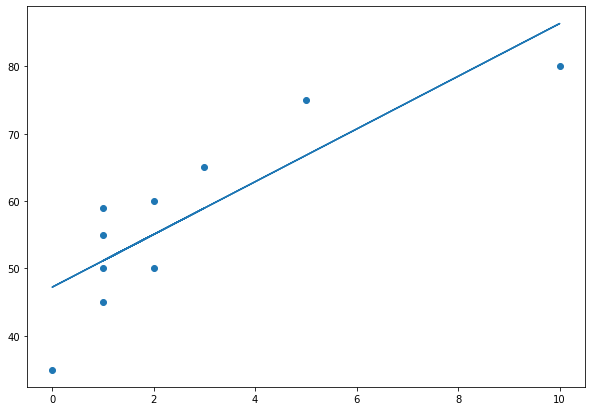

In [17]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
plt.plot(X[1], W[0] + W[1] * X[1])
plt.show()

В итоге, подобрав коэффициенты линейной регрессии методом градиентного спуска, наша модель работает со среднеквадратичной ошибкой 45.9375 и выглядит как на графике выше 